# Jorge Leonardo López Agredo
## cod: 2218061 
### Modelado Matemático II. Prof: David Sierra

En el presente Notebook se presentan los códigos básicos para poder ejecutar los **esquemas de diferencias finitas (EDF)** por el método de Euler implícito (B.E) y Euler explicito (F.E).

Los problemas a estudiar es:
# Condiciones de contorno Direchlet homogéneas, material homogéneo.
$$\begin{cases}
\begin{matrix}
u_t-ku_{xx}=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u(0)=u(L)=0
\end{cases}
$$


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
%matplotlib inline


In [12]:
def EulerExp(M,N):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k=0.2 #difusividad térmica (m^2/s)
    

    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta=0
    Tb=0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta
    Tamp[-1] = Tb
    Tamp[1:-1] = T
    
    #paso en el tiempo
    dt = h**2/(2*k)#Definimos bajo el máximo de la condición de Courant CFL
    
    ##definiendo la matriz A
    lamb = k*dt/h**2
    A = diags([lamb, 1-2*lamb  ,lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
#    A=np.zeros((m-1,m-1))
#    lamb = k*dt/h**2
#    for i in range(m-1):
#        A[i,i]=1-2*lamb    
#    for i in range(m-2):
#        A[i,i+1]=lamb
#        A[i+1,i]=lamb
    
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    for t in range(N):
        T = np.dot(A,Tamp[1:-1])
        Tamp[0] = Ta
        Tamp[-1] = Tb
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método Explícito')
    plt.show()


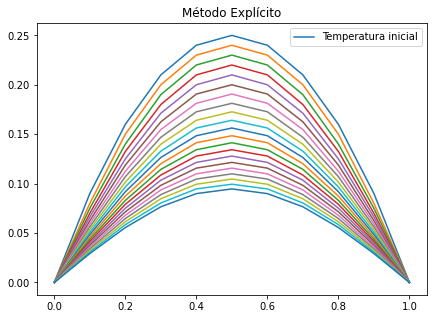

In [13]:
EulerExp(9,20)

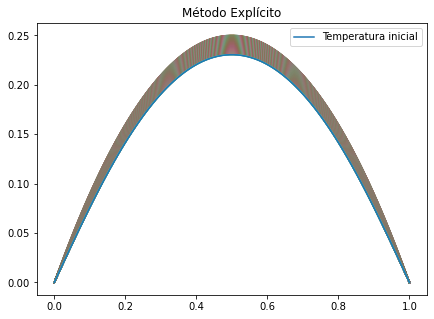

In [4]:
EulerExp(100,200)

In [14]:
def EulerImp(M,N):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k=0.2 #difusividad térmica (m^2/s)
    

    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta=0
    Tb=0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta
    Tamp[-1] = Tb
    Tamp[1:-1] = T
    
    #paso en el tiempo
    dt = 0.1 #Definimos sin restricciones
    
    #definiendo la matriz A
    lamb = k*dt/h**2
    A = diags([-lamb, 1+2*lamb  ,-lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
#    A=np.zeros((m-1,m-1))
#    lamb = k*dt/h**2
#    for i in range(m-1):
#        A[i,i]=1+2*lamb    
#    for i in range(m-2):
#        A[i,i+1]=-lamb
#        A[i+1,i]=-lamb
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    for t in range(N):
        T = np.dot(np.linalg.inv(A),Tamp[1:-1])
        Tamp[0] = Ta
        Tamp[-1] = Tb
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método Implícito')
    plt.show()


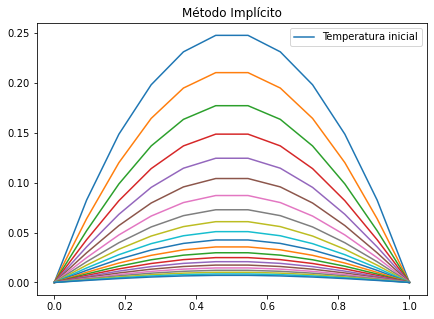

In [10]:
EulerImp(10,20)

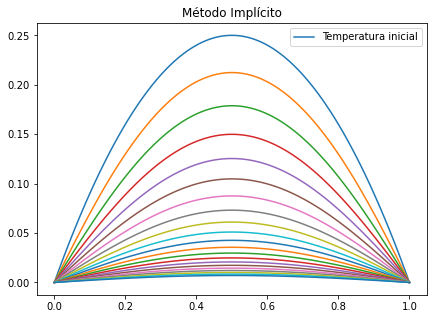

In [15]:
EulerImp(100,20)

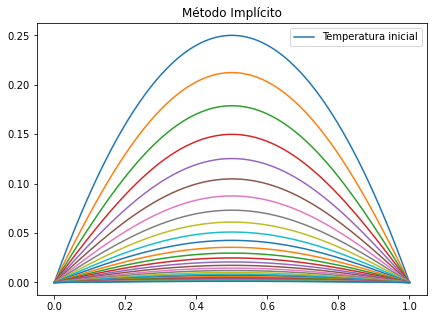

In [8]:
EulerImp(200,30)

In [16]:
def EulerTheta(M,N,theta=0.5):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k=0.2 #difusividad térmica (m^2/s)
    

    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta=0
    Tb=0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta
    Tamp[-1] = Tb
    Tamp[1:-1] = T
    #paso en el tiempo
    if theta>=0.5 and theta<=1:
        dt = 0.1 #Definimos sin restricciones
    else:
        dt = h**2/(2*k*(1-2*theta))#Definimos bajo el máximo de la condición de Courant CFL
    #definiendo la matriz A
    lamb = k*dt/h**2
    A = diags([-theta*lamb, 1+2*theta*lamb  ,-theta*lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
    
    #definiendo la matriz B
    B = diags([(1-theta)*lamb, 1-2*(1-theta)*lamb ,(1-theta)*lamb], [-1, 0, 1], shape=(m-1, m-1)).toarray()
#    A=np.zeros((m-1,m-1))
#    lamb = k*dt/h**2
#    for i in range(m-1):
#        A[i,i]=1+2*theta*lamb    
#    for i in range(m-2):
#        A[i,i+1]=-theta*lamb
#        A[i+1,i]=-theta*lamb
#    
#       #definiendo la matriz B
#    B=np.zeros((m-1,m-1))
#    for i in range(m-1):
#        B[i,i]=1-2*(1-theta)*lamb    
#    for i in range(m-2):
#        B[i,i+1]=(1-theta)*lamb
#        B[i+1,i]=(1-theta)*lamb
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    for t in range(N):
        T = np.dot(np.dot(np.linalg.inv(A),B),Tamp[1:-1])
        Tamp[0] = Ta
        Tamp[-1] = Tb
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método theta '+str(theta))
    plt.show()


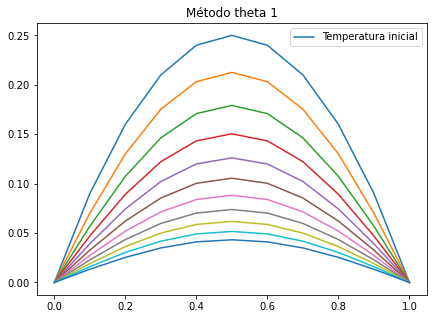

In [18]:
EulerTheta(9, 10,1)

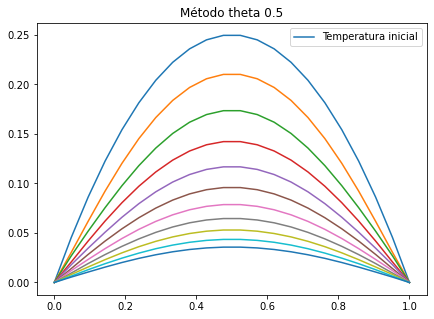

In [19]:
EulerTheta(20, 10,0.5)

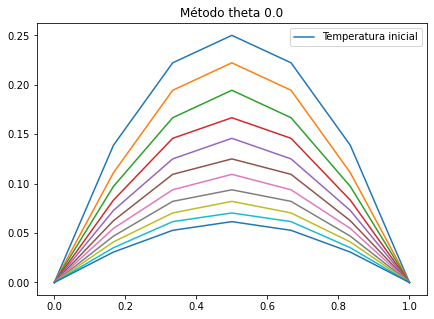

In [20]:
EulerTheta(5, 10,0.)

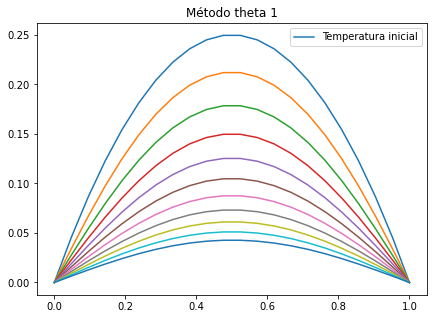

In [21]:
EulerTheta(20, 10,1)

# Veamos ahora el siguiente problema.

# Condiciones de contorno Direchlet homogéneas, material no homogéneo.
$$\begin{cases}
\begin{matrix}
u_t-(k(x)u_{x})_x=0\  \cr
u(0)=u_0\ \text{para} & u_0 \in \mathbb{R}\end{matrix} \cr
u(0)=u(L)=0
\end{cases}
$$

In [35]:
def PrbkVariable(M,N):
    a= 0
    b= 1
    L= b-a# longitud de la barra (m)
    k = lambda x : 0.61*x+0.2 #difusividad térmica (m^2/s)


    #Mallado
    m=M+1
    h=L/m
    Xamp = np.linspace(a,b,m+1)
    x = Xamp[1:-1]
    X = np.linspace(a, b, 2*m+1)
    K = k(X)
    #condición inicial y de frontera
    Tinic = lambda x : x*(L-x)
    Ta=0
    Tb=0
    T=Tinic(x)
    Tamp = np.zeros(m+1)
    Tamp[0] = Ta
    Tamp[-1] = Tb
    Tamp[1:-1] = T

    #paso en el tiempo
    dt = 0.1 #Definimos sin restricciones

    #definiendo la matriz A
    A1 = [1+dt/h**2*(K[2*i+1]+K[2*(i+1)+1]) for i in range (m-1)]
    A2 = [-dt/h**2*K[2*(i+1)+1] for i in range (m-2)]
    A = diags([A1,A2,A2], [0,-1,1]).toarray()
#    A=np.zeros((m-1,m-1))
#    for i in range(m-1):
#        A[i,i]=1+dt/h**2*(K[2*i+1]+K[2*(i+1)+1])    
#    for i in range(m-2):
#        A[i,i+1]=-dt/h**2*K[2*(i+1)+1]
#        A[i+1,i]=-dt/h**2*K[2*(i+1)+1]
    #graficando soluciones en cada paso de tiempo    
    plt.figure(figsize=(7,5))
    plt.plot(Xamp,Tamp, label = 'Temperatura inicial')
    for t in range(N):
        T = np.dot(np.linalg.inv(A),Tamp[1:-1])
        Tamp[0] = Ta
        Tamp[-1] = Tb
        Tamp[1:-1] = T
        plt.plot(Xamp,Tamp)
    plt.legend()
    plt.title(f'Método Implícito')
    plt.show()

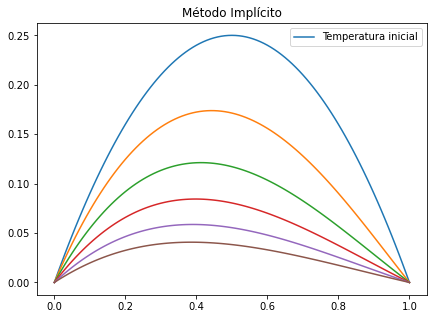

In [36]:
PrbkVariable(99,5)

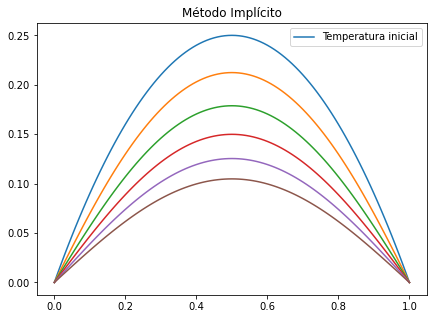

In [37]:
EulerImp(99,5)